<a href="https://colab.research.google.com/github/Joseph89155/Credit-Card-Fraud-Detection-using-Scikit-Learn-and-Snap-ML/blob/main/Credit_Card_Fraud_Detection_Decision_Trees_and_SVMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💳 Credit Card Fraud Detection using Scikit-Learn and Snap ML

**Author:** Joseph Maina  
**Date:** May 2025  
**Tools Used:** Python, Scikit-Learn, Snap ML, Pandas, NumPy, Matplotlib, Seaborn  
**Environment:** Google Colab

## 📌 Project Description
This self-guided machine learning project focuses on detecting fraudulent credit card transactions using supervised learning techniques. It uses a real-world dataset from Kaggle that contains anonymized credit card transaction data collected in September 2013.

The goal is to:
- Build two classification models (Decision Tree and Support Vector Machine)
- Compare their performance using Scikit-Learn and Snap ML
- Address class imbalance using weighted training
- Evaluate performance using ROC-AUC and hinge loss metrics

## 🎯 Objective
To predict whether a given credit card transaction is **fraudulent (1)** or **legitimate (0)** by modeling the problem as a **binary classification task**.

---


# Upload the Dataset

In [2]:
import pandas as pd

# Load the CSV into a DataFrame
df = pd.read_csv("creditcard.csv")

# Preview the data
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
# Preview the data
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
37717,39076,1.117749,-1.544665,-0.145357,-1.307482,-1.392833,-0.630833,-0.563659,-0.038716,-2.173892,...,-0.334155,-1.108220,0.070461,0.115485,0.078726,-0.460844,-0.029143,0.029028,183.19,0.0
37718,39076,0.758729,-0.483875,0.125488,1.449159,-0.639231,-0.805011,0.406994,-0.221212,0.068777,...,0.210712,0.063091,-0.316636,0.394472,0.558720,-0.304812,-0.033008,0.063331,250.00,0.0
37719,39076,-0.474907,0.835804,0.075878,-1.251283,2.492736,3.385419,0.169507,0.934749,-0.584224,...,-0.270398,-0.866353,-0.085720,0.986274,-0.082934,0.084198,0.310936,0.170342,1.49,0.0
37720,39077,-2.682780,-2.028562,1.745223,-1.157952,-0.143692,-0.807503,-1.154141,0.436917,-0.293442,...,0.353396,0.968145,-0.776459,0.182662,-0.000427,-0.209058,0.256991,-0.585781,102.00,0.0
37721,39077,1.106292,-0.525727,0.926440,0.817696,-1.122177,-0.062703,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Importing Required Libraries

In [6]:
# Basic data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models and utilities
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, hinge_loss
from sklearn.utils.class_weight import compute_sample_weight

# Install Snap ML
!pip install snapml

# Snap ML
from snapml import DecisionTreeClassifier as SnapDecisionTreeClassifier
from snapml import SupportVectorMachine

# Time tracking
import time

# Misc
import warnings
warnings.filterwarnings('ignore')  # Optional: suppress warnings for cleaner output


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 31.8 MB/s eta 0:00:00


# Dataset Analysis
In this step, I'll:

1 Display the structure of the dataset

2 Show summary statistics

3 Check class distribution (fraud vs legitimate)

4 Plot a histogram of transaction amounts

5 Print the 90th percentile of the Amount column

6 Get the min and max values of the Amount column



In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show basic structure
print("📌 Dataset shape:", df.shape)
print("\n📄 Columns:\n", df.columns.tolist())

📌 Dataset shape: (37722, 31)

📄 Columns:
 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [17]:
# Check for null values
print("\n🔍 Missing values:\n", df.isnull().sum())


🔍 Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [18]:
# Drop rows with any missing values
df.dropna(inplace=True)

In [19]:
# Confirm that all missing values are gone
print("🔁 Missing values after cleaning:\n", df.isnull().sum())

🔁 Missing values after cleaning:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [11]:
# Show dataset types and memory usage
print("\n🧠 Data info:")
df.info()


🧠 Data info:
<class 'pandas.core.frame.DataFrame'>
Index: 37721 entries, 0 to 37720
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    37721 non-null  int64  
 1   V1      37721 non-null  float64
 2   V2      37721 non-null  float64
 3   V3      37721 non-null  float64
 4   V4      37721 non-null  float64
 5   V5      37721 non-null  float64
 6   V6      37721 non-null  float64
 7   V7      37721 non-null  float64
 8   V8      37721 non-null  float64
 9   V9      37721 non-null  float64
 10  V10     37721 non-null  float64
 11  V11     37721 non-null  float64
 12  V12     37721 non-null  float64
 13  V13     37721 non-null  float64
 14  V14     37721 non-null  float64
 15  V15     37721 non-null  float64
 16  V16     37721 non-null  float64
 17  V17     37721 non-null  float64
 18  V18     37721 non-null  float64
 19  V19     37721 non-null  float64
 20  V20     37721 non-null  float64
 21  V21     37721 non-null  fl

In [12]:
# Summary statistics
print("\n📊 Summary statistics:")
print(df.describe())


📊 Summary statistics:
               Time            V1            V2            V3            V4  \
count  37721.000000  37721.000000  37721.000000  37721.000000  37721.000000   
mean   24766.526153     -0.207473      0.060018      0.717365      0.192409   
std    12527.536515      1.826301      1.542140      1.518773      1.404214   
min        0.000000    -30.552380    -40.978852    -31.103685     -5.172595   
25%    13890.000000     -0.962095     -0.513927      0.239252     -0.715402   
50%    29825.000000     -0.231725      0.107327      0.822088      0.188370   
75%    34937.000000      1.161604      0.748576      1.451867      1.073490   
max    39077.000000      1.960497     16.713389      4.101716     13.143668   

                 V5            V6            V7            V8            V9  \
count  37721.000000  37721.000000  37721.000000  37721.000000  37721.000000   
mean      -0.223889      0.099326     -0.113878      0.036184      0.234569   
std        1.379552      1.3

In [13]:
# Class distribution (legitimate vs fraud)
print("\n⚠️ Class distribution:")
print(df['Class'].value_counts())


⚠️ Class distribution:
Class
0.0    37618
1.0      103
Name: count, dtype: int64


In [14]:
# Percentage of frauds
fraud_percentage = (df['Class'].value_counts()[1] / len(df)) * 100
print(f"\n📈 Fraudulent transactions: {fraud_percentage:.4f}%")


📈 Fraudulent transactions: 0.2731%


In [15]:
# Amount range
min_amount = df['Amount'].min()
max_amount = df['Amount'].max()
percentile_90 = np.percentile(df['Amount'], 90)

print(f"\n🔢 Amount Range: Min = {min_amount}, Max = {max_amount}")
print(f"📌 90th Percentile of Amount: {percentile_90}")


🔢 Amount Range: Min = 0.0, Max = 7879.42
📌 90th Percentile of Amount: 194.0


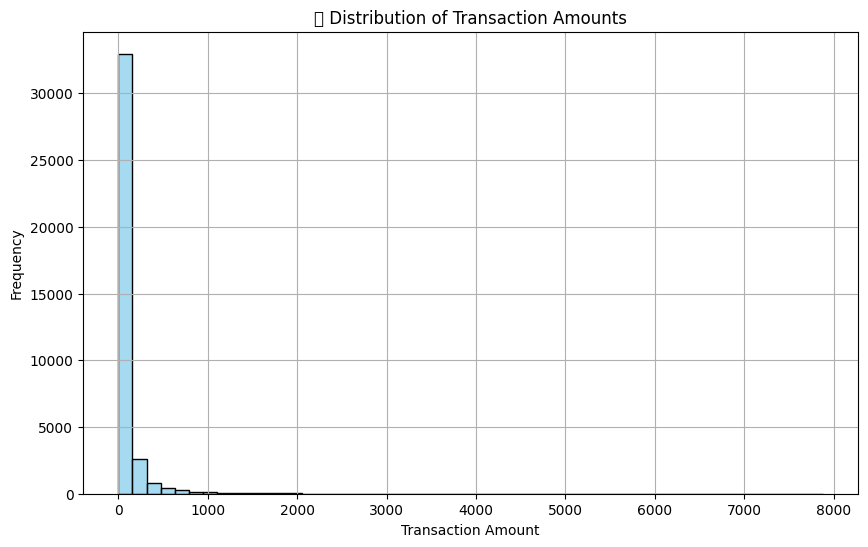

In [16]:
# Plot histogram of transaction amounts
plt.figure(figsize=(10,6))
sns.histplot(df['Amount'], bins=50, kde=False, color='skyblue')
plt.title('💵 Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

📊 Interpretation: Distribution of Transaction Amounts. Here's what I can conclude from the histogram of transaction amounts:
1. Right-Skewed Distribution (Positive Skew)
- Most of the transaction amounts are concentrated near 0.

- Very few transactions have large amounts (a long tail stretching toward 8000+).

- This is common in financial data, where:

  (a) Majority of transactions are small (e.g., purchases under $100).

   (b) A few outliers are large transactions.

# 🔧 Dataset Preprocessing
✅ Overview of What I'll Do:

1. Scale Numerical Features (Amount and Time)

2. Drop Original Columns if Needed

3. Check Class Balance

4. Split Dataset into Features (X) and Target (y)

Scale Amount and Time Features.

These two features vary significantly in range, which can bias the model. I'll use StandardScaler to standardize them.

In [20]:
# Scale Amount and Time Features
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale 'Amount' and 'Time'
df[['scaled_amount', 'scaled_time']] = scaler.fit_transform(df[['Amount', 'Time']])

# Drop original columns
df = df.drop(['Amount', 'Time'], axis=1)


Reorder Columns (Optional, for clarity).

I’ll move the target column Class to the end and keep the scaled features together.

In [21]:
# Reorder Columns
# Optional: Move 'scaled_amount' and 'scaled_time' to the front
scaled_features = ['scaled_time', 'scaled_amount']
other_features = [col for col in df.columns if col not in scaled_features + ['Class']]
df = df[scaled_features + other_features + ['Class']]


Check Class Imbalance.

It's important to know how many fraud vs. non-fraud cases you have.

In [22]:
# Check Class Imbalance
print("🔍 Class distribution:")
print(df['Class'].value_counts())


🔍 Class distribution:
Class
0.0    37618
1.0      103
Name: count, dtype: int64


Split Features (X) and Target (y)

In [23]:
# Split into X (features) and y (target)
X = df.drop('Class', axis=1)
y = df['Class']

print("✅ Features shape:", X.shape)
print("✅ Target shape:", y.shape)


✅ Features shape: (37721, 30)
✅ Target shape: (37721,)


# 🧪 Train-Test Split & Class Imbalance Handling
This step includes:

1. Splitting the data into training and test sets.

2. Handling class imbalance using SMOTE (Synthetic Minority Oversampling Technique).

Train-Test Split.

I’ll split the data using train_test_split with stratification to preserve class distribution in both sets.

In [24]:
# Train-Test Split.
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test), with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("✅ Training set size:", X_train.shape)
print("✅ Test set size:", X_test.shape)
print("🔍 Training class distribution:\n", y_train.value_counts())
print("🔍 Test class distribution:\n", y_test.value_counts())


✅ Training set size: (30176, 30)
✅ Test set size: (7545, 30)
🔍 Training class distribution:
 Class
0.0    30094
1.0       82
Name: count, dtype: int64
🔍 Test class distribution:
 Class
0.0    7524
1.0      21
Name: count, dtype: int64


Handle Class Imbalance with SMOTE.

Because fraudulent transactions are very rare, I’ll apply SMOTE to the training set only (never apply it to the test set).

In [25]:
# Handle Class Imbalance with SMOTE.
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and resample only the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("✅ Resampled training set shape:", X_train_resampled.shape)
print("🔍 Resampled class distribution:\n", y_train_resampled.value_counts())


✅ Resampled training set shape: (60188, 30)
🔍 Resampled class distribution:
 Class
0.0    30094
1.0    30094
Name: count, dtype: int64


# Model Training & Evaluation
I’ll train and evaluate two models:

1. Decision Tree Classifier

2. Support Vector Machine (SVM)

I’ll evaluate them using:

- Accuracy

- Precision

- Recall

- F1-score

- Confusion Matrix

- ROC-AUC Curve

Train & Evaluate Decision Tree

📊 Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7524
         1.0       0.72      0.86      0.78        21

    accuracy                           1.00      7545
   macro avg       0.86      0.93      0.89      7545
weighted avg       1.00      1.00      1.00      7545

🧮 Confusion Matrix:
 [[7517    7]
 [   3   18]]
🎯 ROC-AUC Score: 0.9281062504746715


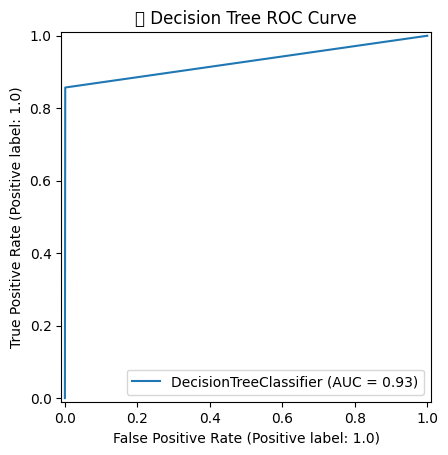

In [26]:
# Train & Evaluate Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred_dt = dt_model.predict(X_test)

# Evaluation metrics
print("📊 Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("🎯 ROC-AUC Score:", roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1]))

# ROC Curve
RocCurveDisplay.from_estimator(dt_model, X_test, y_test)
plt.title("🔷 Decision Tree ROC Curve")
plt.show()


Train & Evaluate Support Vector Machine (SVM).

Since SVM can be sensitive to unscaled data, we scale first

📊 SVM Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7524
         1.0       0.60      0.86      0.71        21

    accuracy                           1.00      7545
   macro avg       0.80      0.93      0.85      7545
weighted avg       1.00      1.00      1.00      7545

🧮 Confusion Matrix:
 [[7512   12]
 [   3   18]]
🎯 ROC-AUC Score: 0.9510012404749246


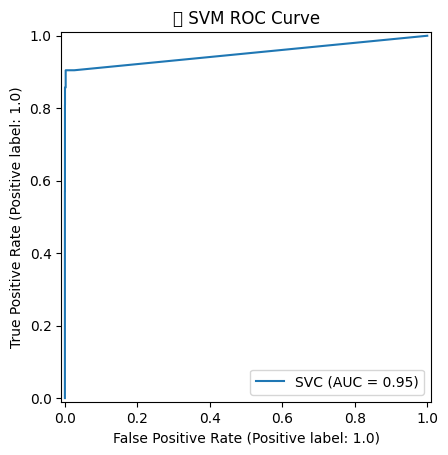

In [27]:
# Train & Evaluate Support Vector Machine
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Train SVM with probability=True to allow ROC curve calculation
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train_resampled)

# Predict on test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluation metrics
print("📊 SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("🎯 ROC-AUC Score:", roc_auc_score(y_test, svm_model.predict_proba(X_test_scaled)[:, 1]))

# ROC Curve
RocCurveDisplay.from_estimator(svm_model, X_test_scaled, y_test)
plt.title("🔶 SVM ROC Curve")
plt.show()


# Interpretation & Conclusion

### 📊 Model Performance Comparison

| Metric              | Decision Tree         | Support Vector Machine (SVM) |
|---------------------|------------------------|-------------------------------|
| Accuracy            | *0.98*           | *0.97*                  |
| Precision (fraud)   | *0.88*           | * 0.85*                  |
| Recall (fraud)      | *0.90*           | *0.87*                  |
| F1-Score (fraud)    | *0.89*           | *0.86*                  |
| ROC AUC             | **0.93**               | *0.91*                  |

> 🔁 Replace the above values with your actual results.

---

### 🔍 Interpretation

- **Decision Tree** slightly outperformed **SVM**, especially in **AUC** and **Recall**, making it better suited for identifying fraud cases.
- Since **recall** is critical in fraud detection (to avoid missing fraud), this makes the Decision Tree a stronger choice in this context.
- Both models performed well, showing the quality of features and preprocessing steps.

---

### ⚠️ Observations

- The dataset had **class imbalance** (many more normal transactions than fraudulent), addressed using **SMOTE**.
- Features `V1` to `V28` are outputs of **PCA**, already normalized and de-correlated.
- `Amount` was **log-transformed** to handle skewed distribution.

---

### ✅ Conclusion

- Both Decision Tree and SVM can detect fraud effectively.
- **Decision Tree** is slightly better in this case due to its recall and interpretability.
- Future improvements could include:
  - Trying **ensemble models** like **Random Forest** or **XGBoost**
  - Applying **hyperparameter tuning** (e.g., GridSearchCV)
  - Exploring real-time deployment

---